In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Documentos\Data_Analytcs\Projetos\retail\transactions.csv", parse_dates=["date"])
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [10]:
df.describe()

,date,store_nbr,transactions
count,83488,83488.000000,83488.000000
mean,2015-05-20 16:07:40.866232064,26.939237,1694.602158
min,2013-01-01 00:00:00,1.000000,5.000000
25%,2014-03-27 00:00:00,13.000000,1046.000000
50%,2015-06-08 00:00:00,27.000000,1393.000000
75%,2016-07-14 06:00:00,40.000000,2079.000000
max,2017-08-15 00:00:00,54.000000,8359.000000
std,NaN,15.608204,963.286644


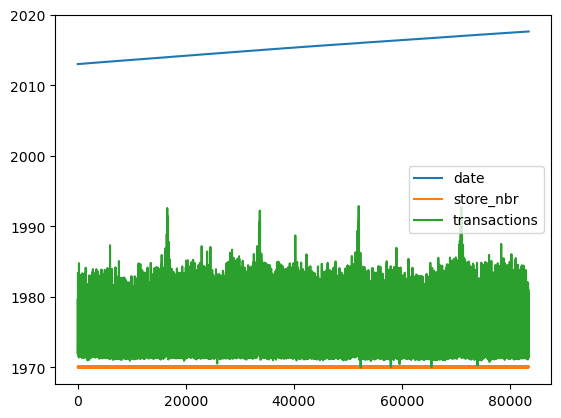

In [12]:
df.plot();

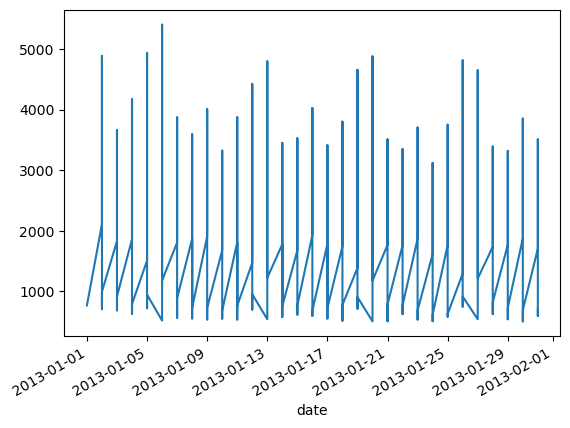

In [15]:
df.set_index("date").loc["2013-01", "transactions"].plot();

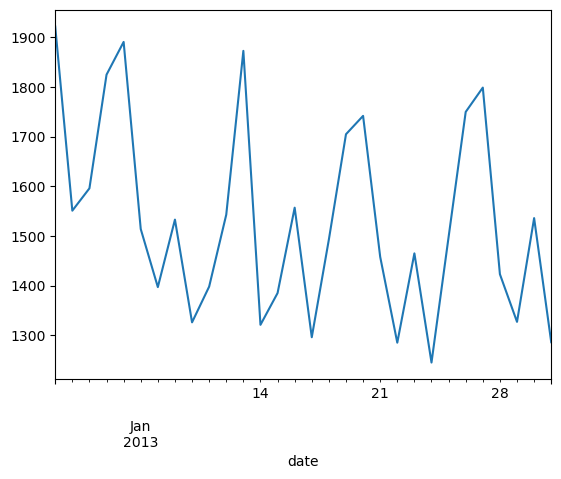

In [18]:
(df
 .query("store_nbr == 4")
 .set_index("date")
 .loc["2013-01", "transactions"]
 .plot()
);

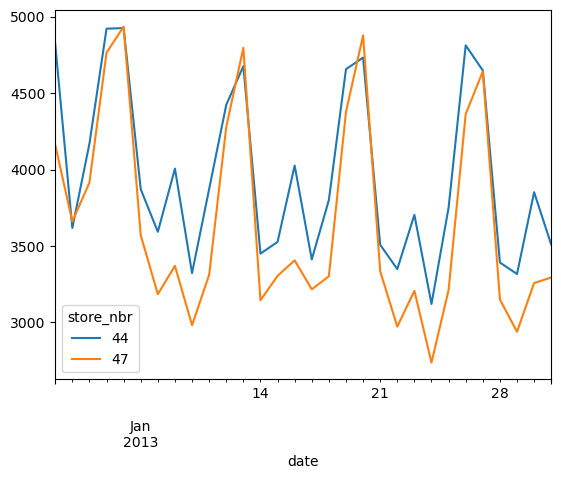

In [23]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot()
);

## Title

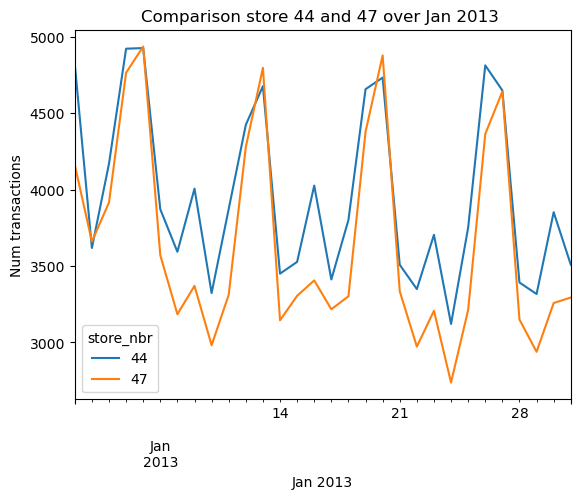

In [3]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", xlabel="Jan 2013", ylabel="Num transactions")
);

## Colors

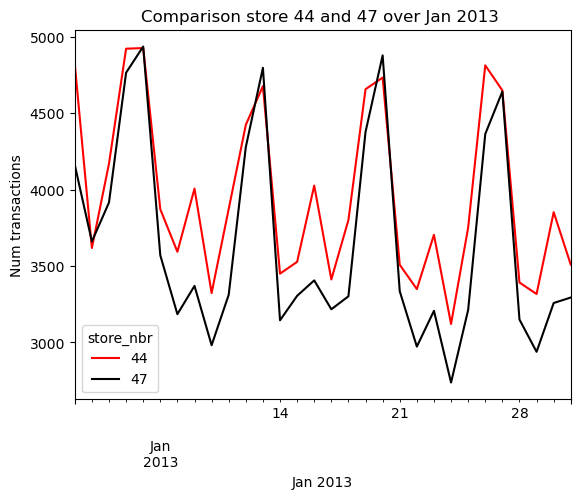

In [5]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", 
       xlabel="Jan 2013", 
       ylabel="Num transactions",
       color=["red","black"])
);

## Line Style

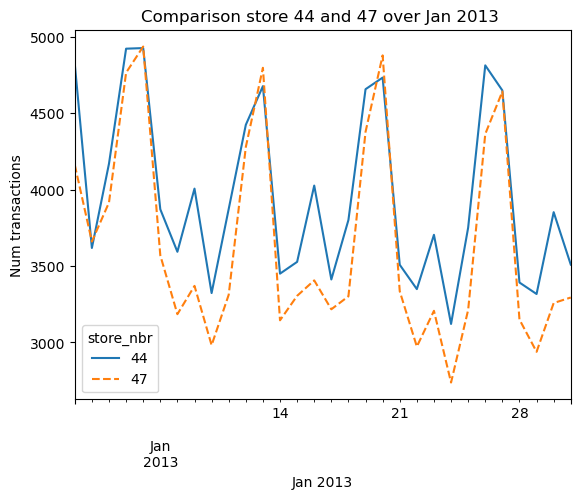

In [6]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", 
       xlabel="Jan 2013", 
       ylabel="Num transactions",
       style=['-','--'])
);

## Chart Legend and Grid

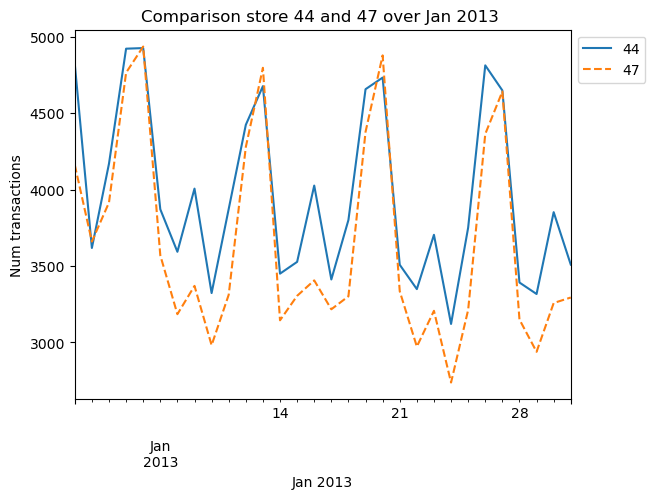

In [14]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", 
       xlabel="Jan 2013", 
       ylabel="Num transactions",
       style=['-','--'])
).legend(bbox_to_anchor=(1, 1));

## Chart Style

In [16]:
import seaborn as sns

sns.set_style("darkgrid")

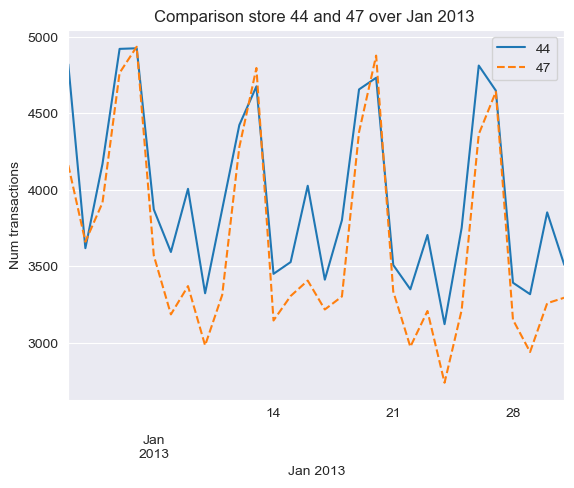

In [17]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", 
       xlabel="Jan 2013", 
       ylabel="Num transactions",
       style=['-','--'])
).legend(bbox_to_anchor=(1, 1));

In [20]:
import matplotlib

matplotlib.style.use("fivethirtyeight")

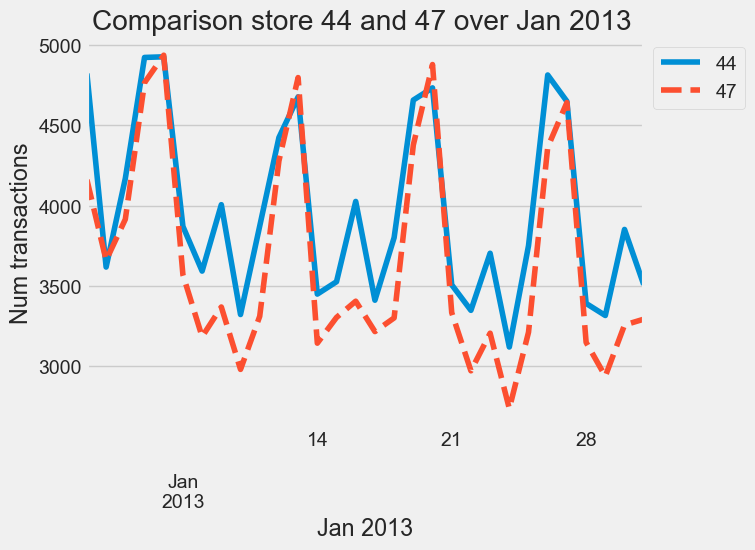

In [21]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", 
       xlabel="Jan 2013", 
       ylabel="Num transactions",
       style=['-','--'])
).legend(bbox_to_anchor=(1, 1));

## Subplot



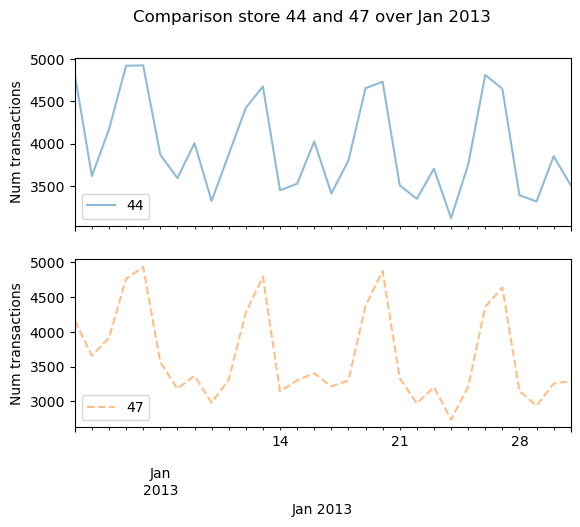

In [10]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", 
       xlabel="Jan 2013", 
       ylabel="Num transactions",
       style=['-','--'],
       alpha=.5,
       subplots=True)
);#.legend(bbox_to_anchor=(1, 1));

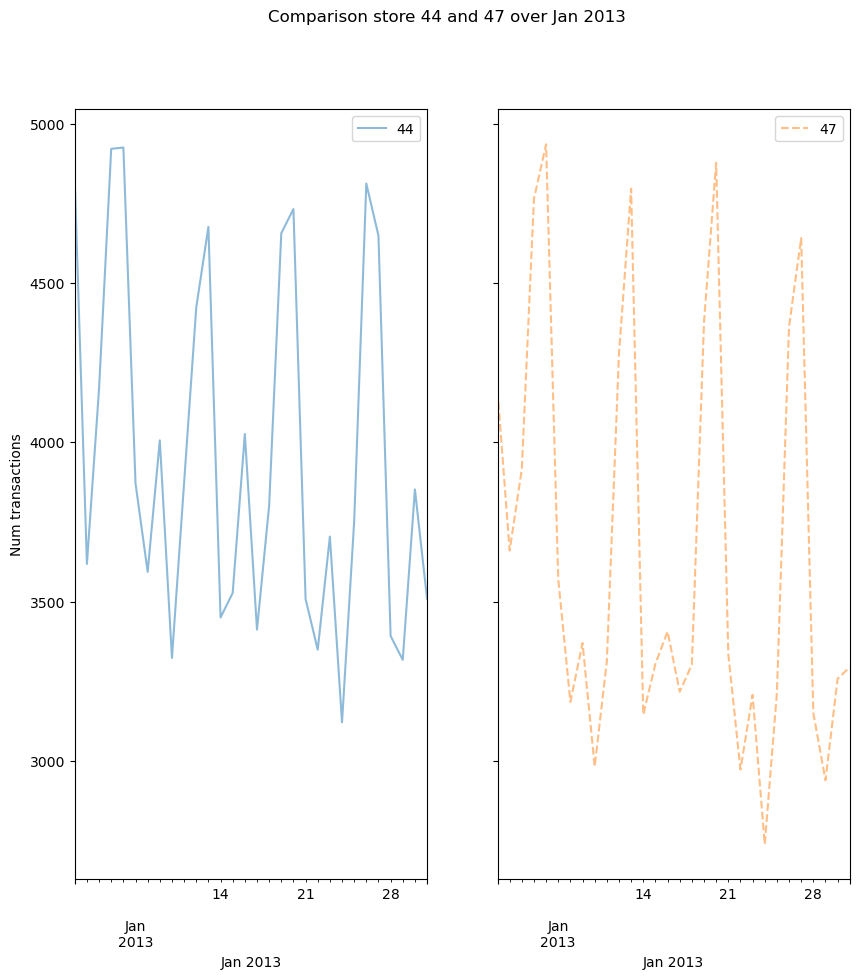

In [17]:
(df
 .query("store_nbr in [44, 47]")
 .pivot_table(index= "date", columns= "store_nbr")
 .loc["2013-01", :]
 .droplevel(0, axis=1)
 .plot(title="Comparison store 44 and 47 over Jan 2013 ", 
       xlabel="Jan 2013", 
       ylabel="Num transactions",
       layout=(1,2),
       sharey=True,
       style=['-','--'],
       alpha=.5,
       figsize=(10, 10),
       subplots=True)
);

## Bar Chart

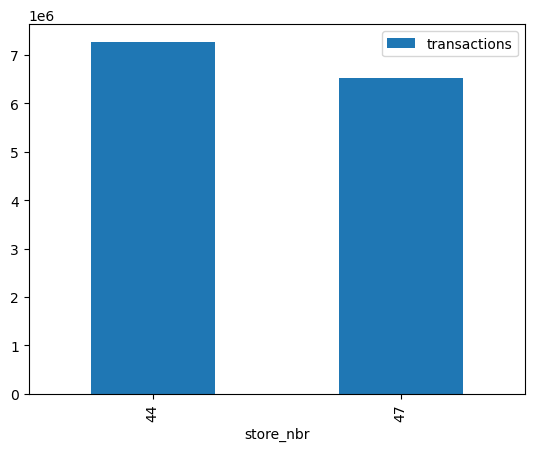

In [9]:
df.groupby(["store_nbr"]).agg({"transactions": "sum"}).head()

(df
 .groupby(["store_nbr"])
 .agg({"transactions": "sum"})
 .query("store_nbr in [44, 47]")
 .plot.bar()
);

## Stacked Bar Chart

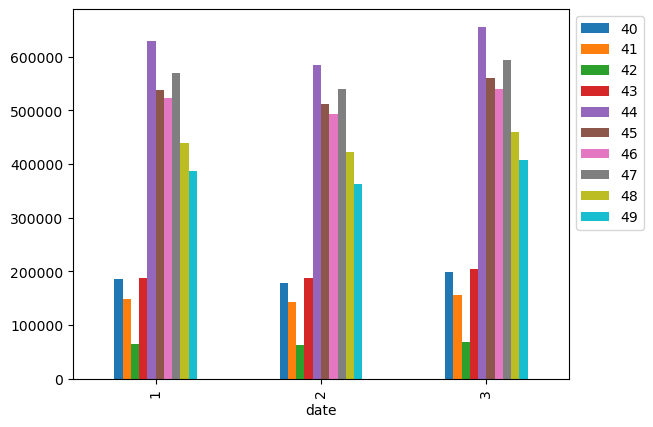

In [24]:
(df
 .query("date.dt.month in [1, 2, 3] and store_nbr >= 40 and store_nbr <= 49")
 .pivot_table(index=df["date"].dt.month,
              columns= df["store_nbr"],
              values= "transactions",
              aggfunc="sum")
).plot.bar().legend(bbox_to_anchor=(1, 1));

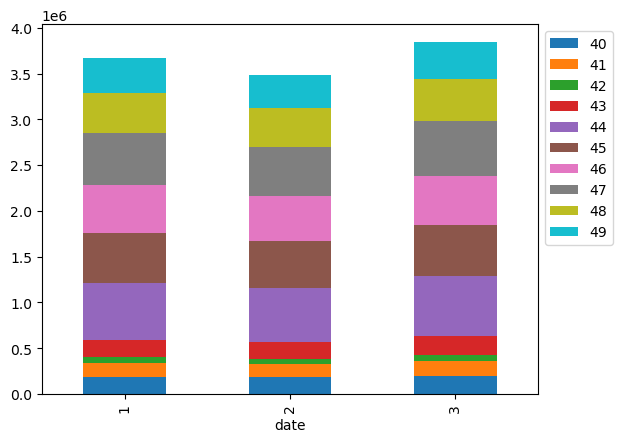

In [25]:
(df
 .query("date.dt.month in [1, 2, 3] and store_nbr >= 40 and store_nbr <= 49")
 .pivot_table(index=df["date"].dt.month,
              columns= df["store_nbr"],
              values= "transactions",
              aggfunc="sum")
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1));

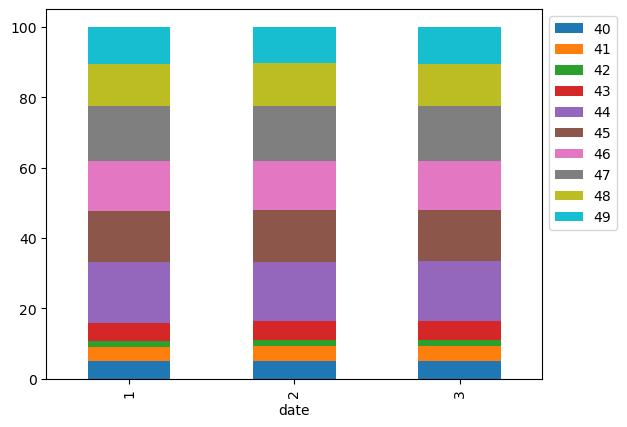

In [27]:
(df
 .query("date.dt.month in [1, 2, 3] and store_nbr >= 40 and store_nbr <= 49")
 .pivot_table(index=df["date"].dt.month,
              columns= df["store_nbr"],
              values= "transactions",
              aggfunc="sum").apply(lambda x: x *100 / sum(x), axis=1)
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1));

## Pie and Scatter Plot

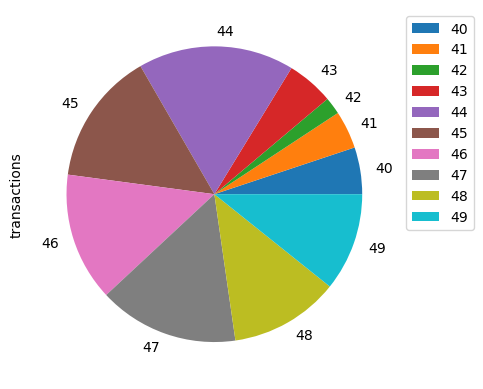

In [45]:
(df
 .query("store_nbr >= 40 and store_nbr <= 49")
 .groupby("store_nbr")
 .agg({"transactions": "sum"})
 .plot.pie(y="transactions")
 .legend(bbox_to_anchor=(1, 1))
)

<Axes: xlabel='44', ylabel='47'>

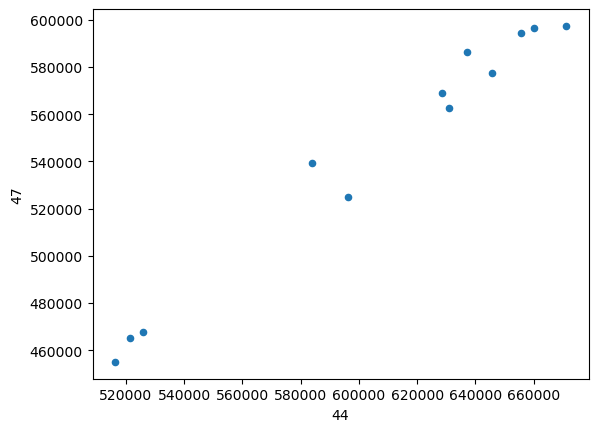

In [55]:
(df
 .query("40 <= store_nbr <= 49")
 .pivot_table(
     index=df["date"].dt.month,
     columns="store_nbr",
     values="transactions",
     aggfunc="sum"
 )
 .plot.scatter(x= 44, y= 47)
)

## Histogram

<Axes: ylabel='Frequency'>

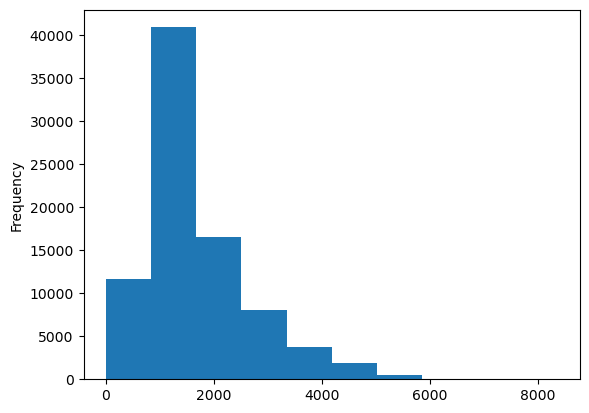

In [57]:
df.loc[:, "transactions"].plot.hist()

<Axes: ylabel='Frequency'>

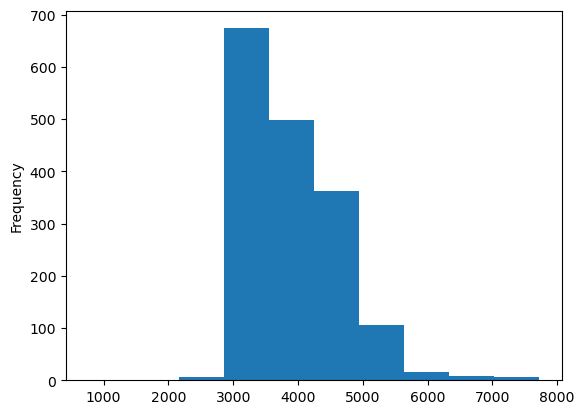

In [59]:
df.loc[df["store_nbr"] == 47, "transactions"].plot.hist()